In [2]:
import pandas as pd
import numpy as np
import openmatrix as omx
import config
from mc_util import *
import matplotlib.pyplot as plt
import seaborn as sns

geography = ['Boston and Neighboring Towns',
 'Within I-93/95',
 'Within I-495',
 'Entire Region']

In [ ]:
# trip tables: 2016 vs. 2040

trips_2016 = store_omx_as_dict('../Other/Aggregated Matrix_2016/pre_MC_trip_6_purposes.omx')

trips_2040 =  store_omx_as_dict('../Other/Aggregated Matrix_2040NB/pre_MC_trip_6_purposes.omx')

In [4]:
tdm = store_omx_as_dict(r"C:\Users\lllll\Documents\CR\CFB\Files\output\2040_trips_TDM.omx")

In [6]:
tdm.keys()

dict_keys(['Bike_0_OP', 'Bike_0_PK', 'Bike_1_OP', 'Bike_1_PK', 'DAT_B_0_OP', 'DAT_B_0_PK', 'DAT_B_1_OP', 'DAT_B_1_PK', 'DAT_CR_0_OP', 'DAT_CR_0_PK', 'DAT_CR_1_OP', 'DAT_CR_1_PK', 'DAT_LB_0_OP', 'DAT_LB_0_PK', 'DAT_LB_1_OP', 'DAT_LB_1_PK', 'DAT_RT_0_OP', 'DAT_RT_0_PK', 'DAT_RT_1_OP', 'DAT_RT_1_PK', 'DA_0_OP', 'DA_0_PK', 'DA_1_OP', 'DA_1_PK', 'SR2_0_OP', 'SR2_0_PK', 'SR2_1_OP', 'SR2_1_PK', 'SR3+_0_OP', 'SR3+_0_PK', 'SR3+_1_OP', 'SR3+_1_PK', 'WAT_0_OP', 'WAT_0_PK', 'WAT_1_OP', 'WAT_1_PK', 'Walk_0_OP', 'Walk_0_PK', 'Walk_1_OP', 'Walk_1_PK'])

In [5]:
trips_2016.keys()

dict_keys(['HBO_OP_0Auto', 'HBO_OP_wAuto', 'HBO_PK_0Auto', 'HBO_PK_wAuto', 'HBSc1_OP_0Auto', 'HBSc1_OP_wAuto', 'HBSc1_PK_0Auto', 'HBSc1_PK_wAuto', 'HBSc2_OP_0Auto', 'HBSc2_OP_wAuto', 'HBSc2_PK_0Auto', 'HBSc2_PK_wAuto', 'HBSc3_OP_0Auto', 'HBSc3_OP_wAuto', 'HBSc3_PK_0Auto', 'HBSc3_PK_wAuto', 'HBW_OP_0Auto', 'HBW_OP_wAuto', 'HBW_PK_0Auto', 'HBW_PK_wAuto', 'NHB_OP_0Auto', 'NHB_OP_wAuto', 'NHB_PK_0Auto', 'NHB_PK_wAuto'])

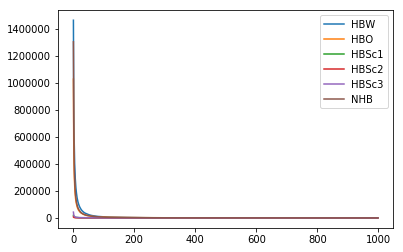

In [19]:
import matplotlib.pyplot as plt
for purpose in ['HBW','HBO','HBSc1','HBSc2','HBSc3','NHB']:
    hist = np.zeros(999)
    for pv in ['_OP_0Auto','_OP_wAuto','_PK_0Auto','_PK_wAuto']:
        table = purpose + pv
        for i in range(2730):        
            a = trips_2016[table][:2730, i]
            hist+= np.histogram(a,bins =np.arange(10,step = 0.01))[0]
    plt.plot(range(len(hist))[1:],hist[1:], label = purpose)
plt.legend()
plt.show()

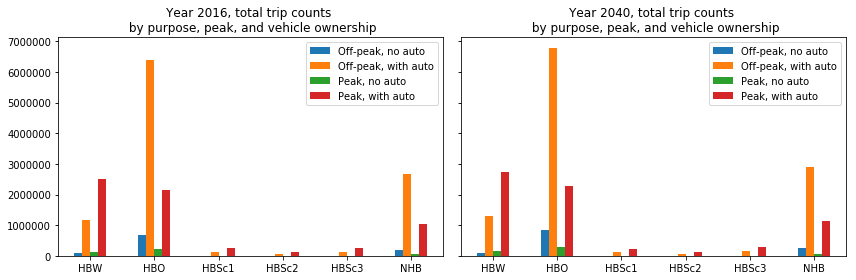

In [120]:
import matplotlib.pyplot as plt


fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4), sharey='row')
# 1
df = pd.DataFrame(0.0,
                  columns =  ['_OP_0Auto','_OP_wAuto','_PK_0Auto','_PK_wAuto'], 
                  index = ['HBW','HBO','HBSc1','HBSc2','HBSc3','NHB'])

for purpose in ['HBW','HBO','HBSc1','HBSc2','HBSc3','NHB']:
    for pv in ['_PK_0Auto','_PK_wAuto','_OP_0Auto','_OP_wAuto']:
        table = purpose + pv
        df[pv][purpose]=trips_2016[table][:2730,:2730].sum()


df1 = pd.DataFrame({'Off-peak, no auto': df['_OP_0Auto'],
                   'Off-peak, with auto': df['_OP_wAuto'],
                   'Peak, no auto': df['_PK_0Auto'],
                   'Peak, with auto': df['_PK_wAuto'],}, index = df.index)
df1.plot.bar(rot=0, ax = ax[0], title = 'Year 2016, total trip counts \n by purpose, peak, and vehicle ownership')

# 3
df = pd.DataFrame(0.0,
                  columns =  ['_OP_0Auto','_OP_wAuto','_PK_0Auto','_PK_wAuto'], 
                  index = ['HBW','HBO','HBSc1','HBSc2','HBSc3','NHB'])

for purpose in ['HBW','HBO','HBSc1','HBSc2','HBSc3','NHB']:
    for pv in ['_PK_0Auto','_PK_wAuto','_OP_0Auto','_OP_wAuto']:
        table = purpose + pv
        df[pv][purpose]=trips_2040[table][:2730,:2730].sum()


df1 = pd.DataFrame({'Off-peak, no auto': df['_OP_0Auto'],
                   'Off-peak, with auto': df['_OP_wAuto'],
                   'Peak, no auto': df['_PK_0Auto'],
                   'Peak, with auto': df['_PK_wAuto'],}, index = df.index)
df1.plot.bar(rot=0, ax = ax[1], title = 'Year 2040, total trip counts \n by purpose, peak, and vehicle ownership')



plt.tight_layout()


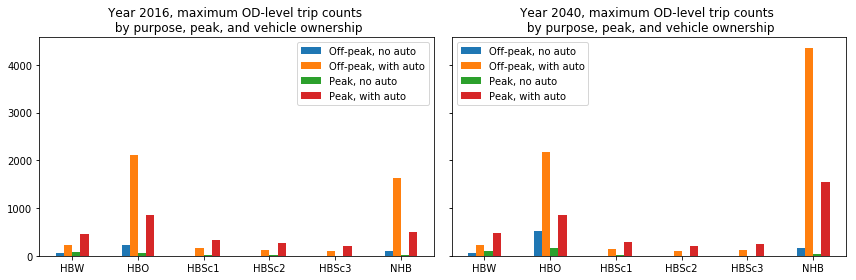

In [123]:

fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4), sharey='row')
# 2
df_max = pd.DataFrame(0.0,
                  columns =  ['_OP_0Auto','_OP_wAuto','_PK_0Auto','_PK_wAuto'], 
                  index = ['HBW','HBO','HBSc1','HBSc2','HBSc3','NHB'])

for purpose in ['HBW','HBO','HBSc1','HBSc2','HBSc3','NHB']:
    for pv in ['_PK_0Auto','_PK_wAuto','_OP_0Auto','_OP_wAuto']:
        table = purpose + pv
        df_max[pv][purpose]=trips_2016[table][:2730,:2730].max()
        
df2 = pd.DataFrame({'Off-peak, no auto': df_max['_OP_0Auto'],
                   'Off-peak, with auto': df_max['_OP_wAuto'],
                   'Peak, no auto': df_max['_PK_0Auto'],
                   'Peak, with auto': df_max['_PK_wAuto'],}, index = df_max.index)

df2.plot.bar(rot=0, ax = ax[0], title = 'Year 2016, maximum OD-level trip counts \n by purpose, peak, and vehicle ownership')


# 4
df_max = pd.DataFrame(0.0,
                  columns =  ['_OP_0Auto','_OP_wAuto','_PK_0Auto','_PK_wAuto'], 
                  index = ['HBW','HBO','HBSc1','HBSc2','HBSc3','NHB'])

for purpose in ['HBW','HBO','HBSc1','HBSc2','HBSc3','NHB']:
    for pv in ['_PK_0Auto','_PK_wAuto','_OP_0Auto','_OP_wAuto']:
        table = purpose + pv
        df_max[pv][purpose]=trips_2040[table][:2730,:2730].max()
        
df2 = pd.DataFrame({'Off-peak, no auto': df_max['_OP_0Auto'],
                   'Off-peak, with auto': df_max['_OP_wAuto'],
                   'Peak, no auto': df_max['_PK_0Auto'],
                   'Peak, with auto': df_max['_PK_wAuto'],}, index = df_max.index)

df2.plot.bar(rot=0, ax = ax[1], title = 'Year 2040, maximum OD-level trip counts \n by purpose, peak, and vehicle ownership')

plt.tight_layout()

In [ ]:
# skims

In [ ]:
# 

In [58]:
df1

VMT to/from Boston                \
index                              Boston and Neighboring Towns Entire Region   
scenario                                                                        
CAV                                                    1.013231      1.017749   
TDM                                                    1.000000      1.000000   
active_transportation_improvements                     0.984252      0.993572   
clean_vehicle                                          1.003684      1.007772   
congestion_charge                                      0.976863      0.970907   
growth_shift                                           1.878374      1.441601   
transit_improvements                                   0.990325      0.995547   

                                                                
index                              Within I-495 Within I-93/95  
scenario                                                        
CAV                                    1.016707       1.013983  
TDM                                    1.000000       1.000000  
active_transportation_improvements     0.992950       0.986854  
clean_vehicle                          1.006816       1.004038  
congestion_charge                      0.971554       0.974027  
growth_shift                           1.475099       1.802464  
transit_improvements                   0.995211       0.991931

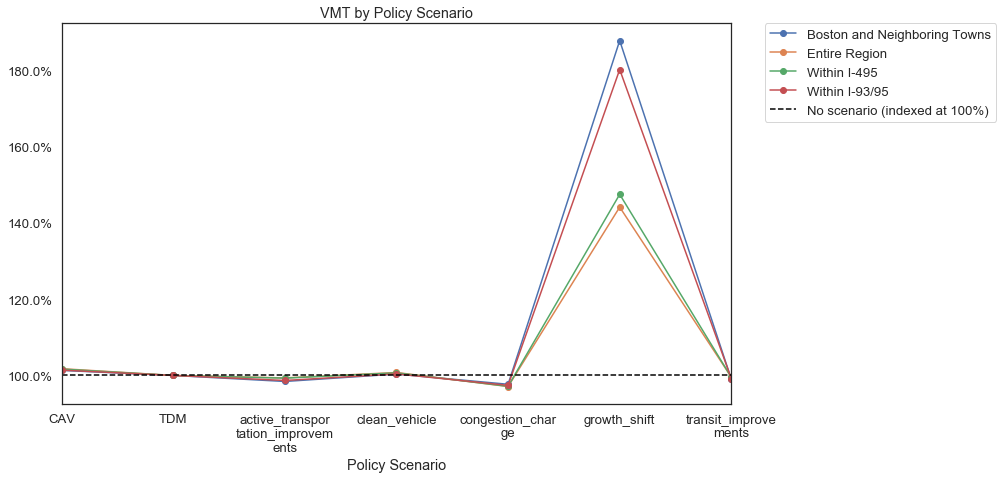

In [64]:
# line plot for VMT, indexed at 100%
from textwrap import wrap
sns.set(style="white", font_scale = 1.2)

df_vmt = pd.read_csv(r'..\output\vmt_summary_subregions.csv',index_col = 0).assign(scenario = " None")

import os
for dirs in next(os.walk(r'..\output\\'))[1]:
    try:
        df_vmt = pd.concat([df_vmt,
    pd.read_csv(r'..\output\\'+dirs+'\\vmt_summary_subregions.csv',index_col = 0).assign(scenario = dirs)],
              )
    except:pass


df = df_vmt.reset_index().pivot('scenario','index')
df1 = df.div(df.loc[' None']).drop(' None').droplevel(0, axis = 1)

ax = df1.plot(figsize = (12,7), marker = 'o')
ax.axhline(1, ls = '--', color = 'black', label = 'No scenario (indexed at 100%)')

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])

ax.set_title('VMT by Policy Scenario')

ax.set_xticklabels([ '\n'.join(wrap(l.get_text(), 15)) for l in ax.get_xticklabels()])

ax.set_ylabel('')
ax.set_xlabel('Policy Scenario')

ax.legend().set_title('Geography')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

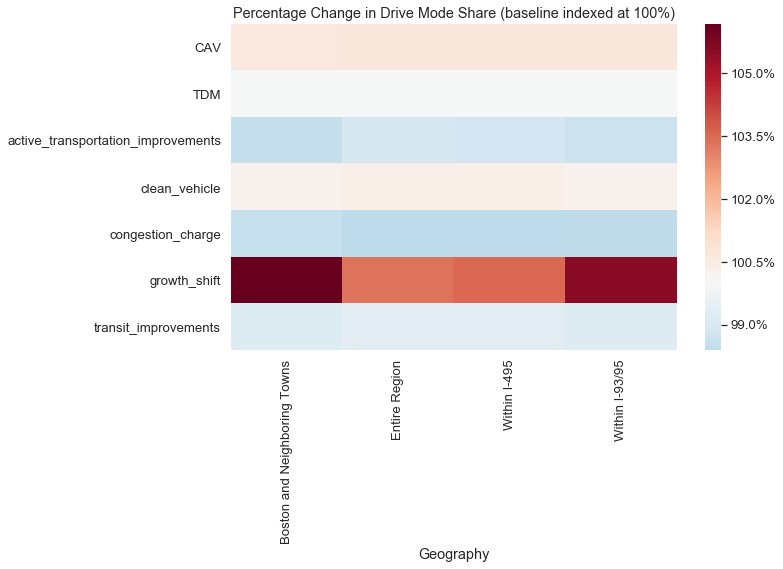

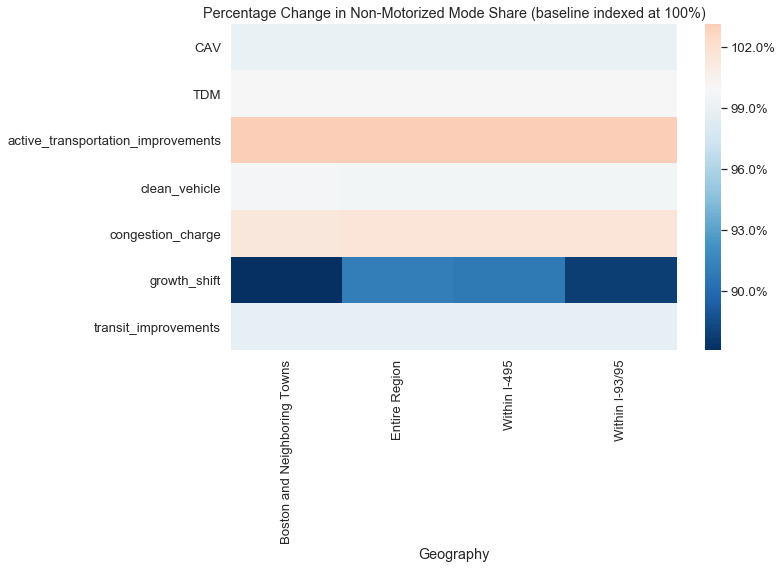

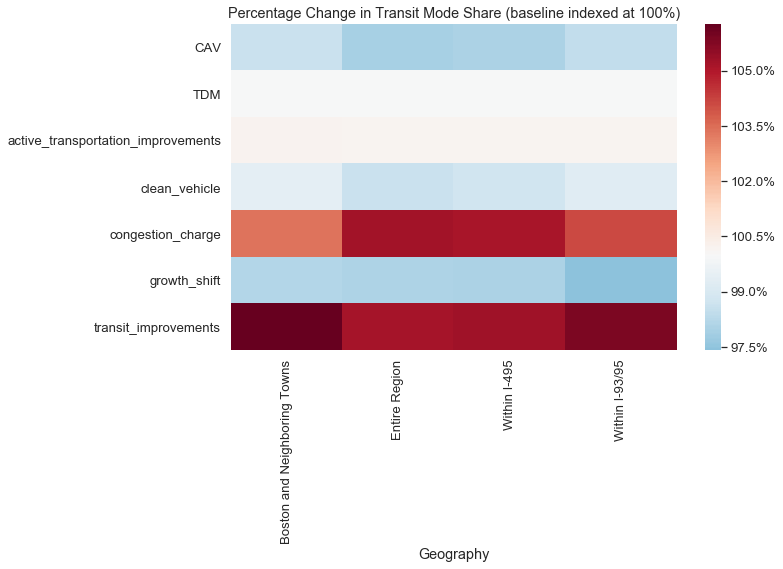

In [69]:
# heatmap
df_mode_share = pd.read_csv(r'..\output\mode_share_summary_subregions.csv',index_col = 0).assign(scenario = " None")

import os
for dirs in next(os.walk(r'..\output\\'))[1]:
    try:
        df_mode_share = pd.concat([df_mode_share,
    pd.read_csv(r'..\output\\'+dirs+'\\mode_share_summary_subregions.csv',index_col = 0).assign(scenario = dirs)],
              )
    except:pass

for mode in ['drive','non-motorized','transit']:
    df = df_mode_share.reset_index().pivot('scenario','index')[mode]
    df1 = df.div(df.loc[' None']).drop(' None')
    
    fig,ax = plt.subplots(figsize = (10,6))
    sns.heatmap(df1, ax = ax, center=1, cmap = "RdBu_r")
    
    cbar = ax.collections[0].colorbar
    cbar.set_ticks(cbar.get_ticks())
    cbar.set_ticklabels(['{:,.1%}'.format(x) for x in cbar.get_ticks()])
    
    
    ax.set_title('Percentage Change in '+ f'{mode} mode share'.title()+ ' (baseline indexed at 100%)')
       
    ax.set_ylabel('')
    ax.set_xlabel('Geography')
    

plt.show()

C:\Users\xy.chang\AppData\Local\conda\conda\envs\py36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


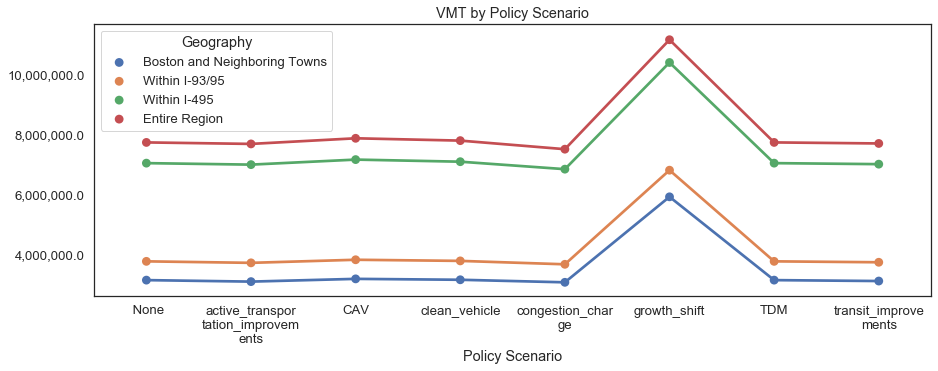

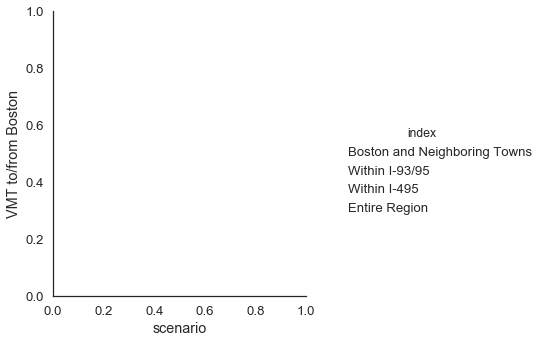

In [34]:
# vmt

fig, ax = plt.subplots(figsize = (15,5))
sns.factorplot(x = 'scenario', y = 'VMT to/from Boston', hue = 'index',
        data = df_vmt.reset_index(), ax = ax)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,}'.format(x) for x in vals])

ax.set_title('VMT by Policy Scenario')

ax.set_xticklabels([ '\n'.join(wrap(l.get_text(), 15)) for l in ax.get_xticklabels()])

ax.set_ylabel('')
ax.set_xlabel('Policy Scenario')

ax.legend().set_title('Geography')
# ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

C:\Users\xy.chang\AppData\Local\conda\conda\envs\py36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\xy.chang\AppData\Local\conda\conda\envs\py36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\xy.chang\AppData\Local\conda\conda\envs\py36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the defau

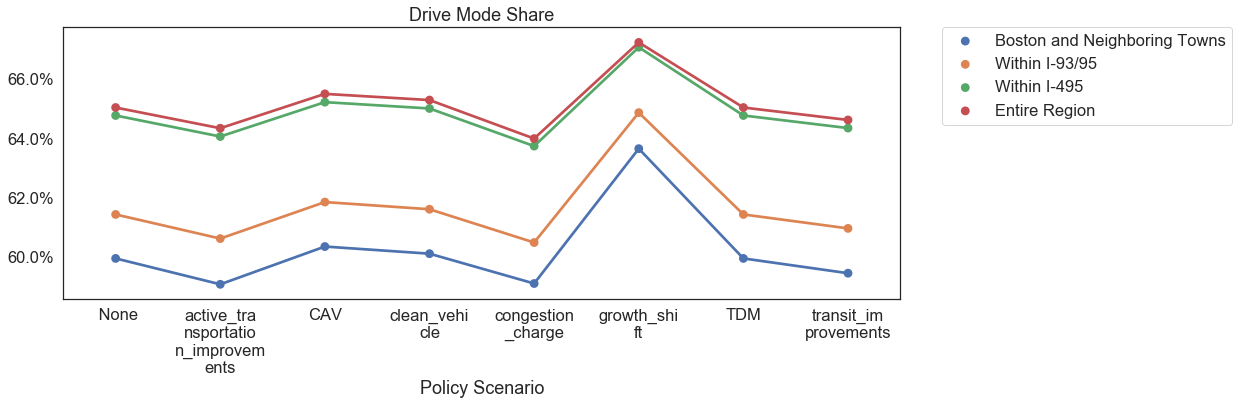

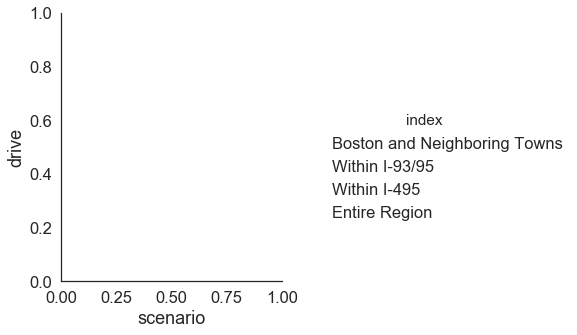

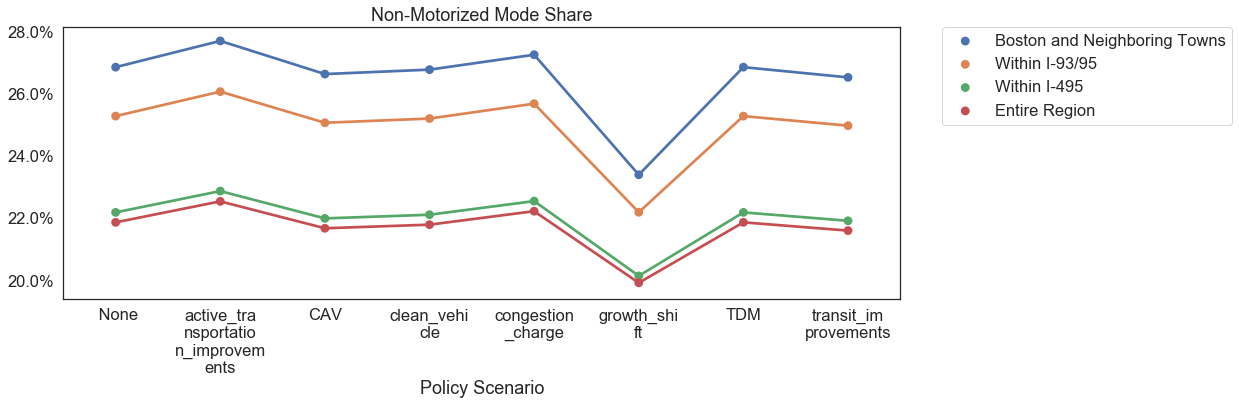

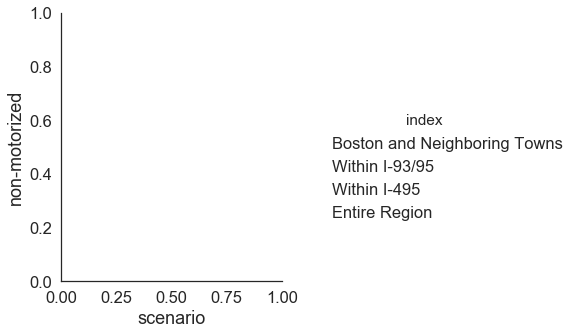

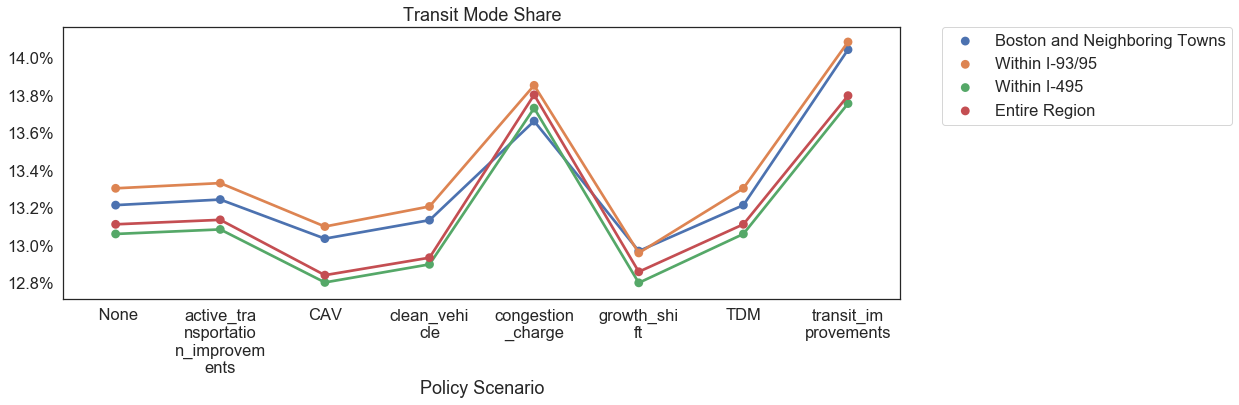

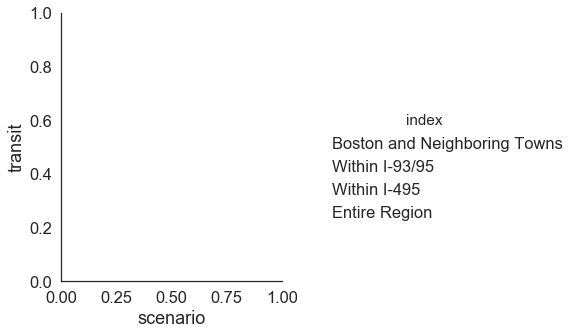

In [70]:
# mode share
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", font_scale = 1.5)

for mode in ['drive','non-motorized','transit']:
    fig, ax = plt.subplots(figsize = (15,5))
    sns.factorplot(x = 'scenario', y = mode, hue = 'index',
        data = df_mode_share.reset_index(), ax = ax)
    
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
    
    ax.set_title(f'{mode} mode share'.title())
    
    ax.set_xticklabels([ '\n'.join(wrap(l.get_text(), 10)) for l in ax.get_xticklabels()])
    
    ax.set_ylabel('')
    ax.set_xlabel('Policy Scenario')
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#    ax.legend().set_title('Geography')
    
plt.show()

C:\Users\xy.chang\AppData\Local\conda\conda\envs\py36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\xy.chang\AppData\Local\conda\conda\envs\py36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\xy.chang\AppData\Local\conda\conda\envs\py36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the defau

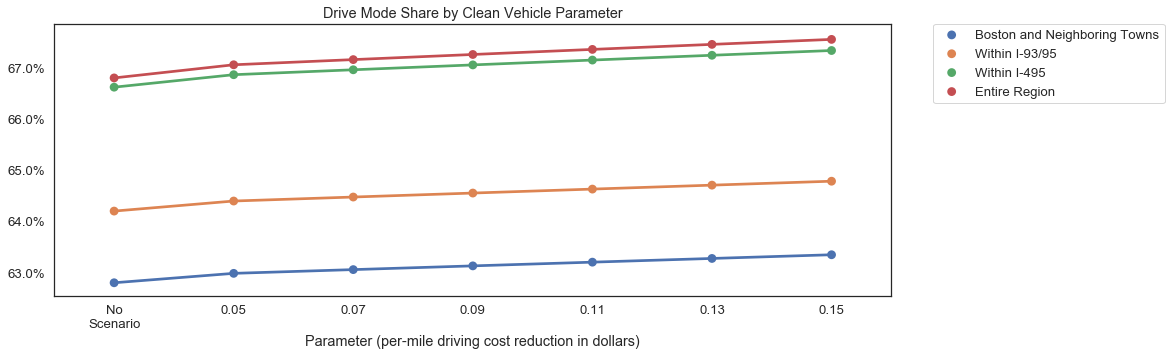

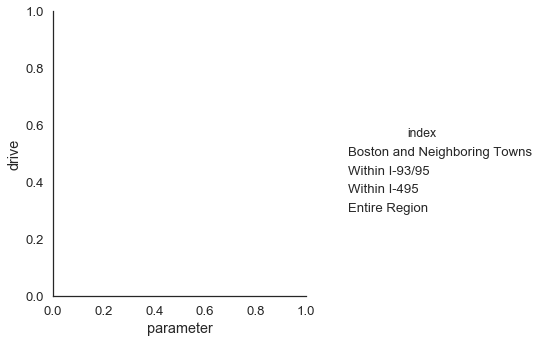

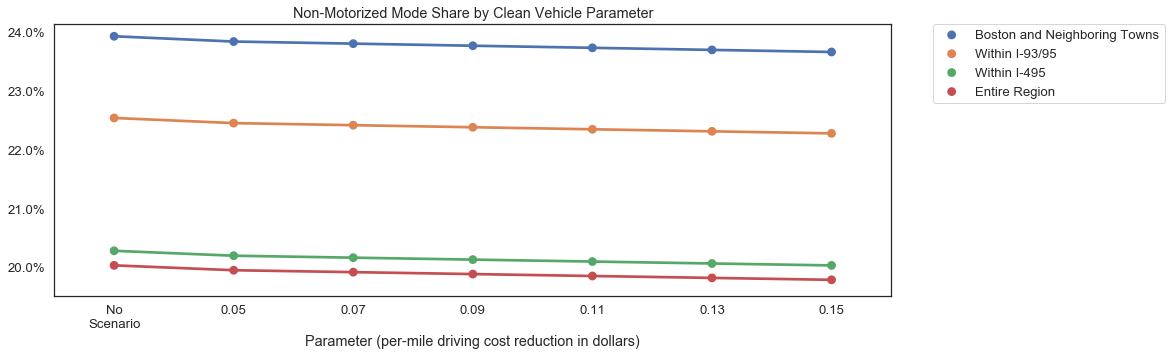

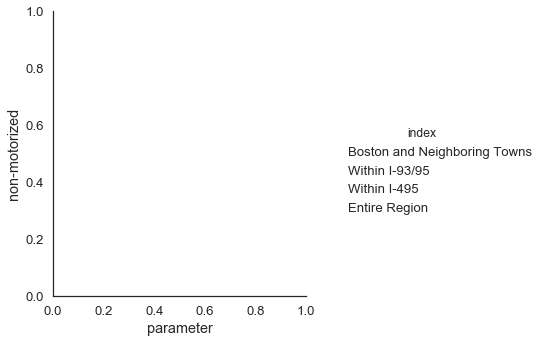

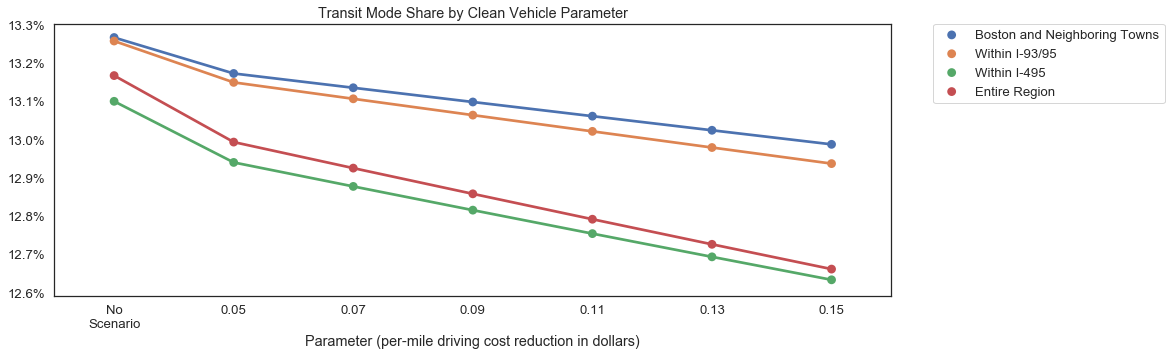

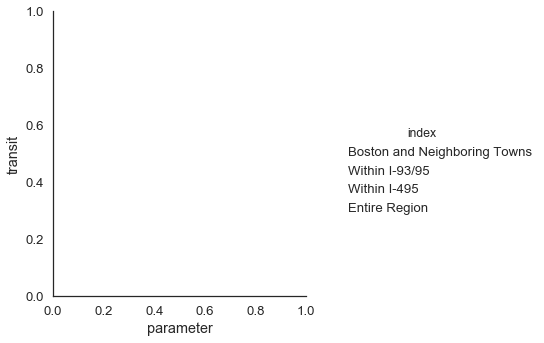

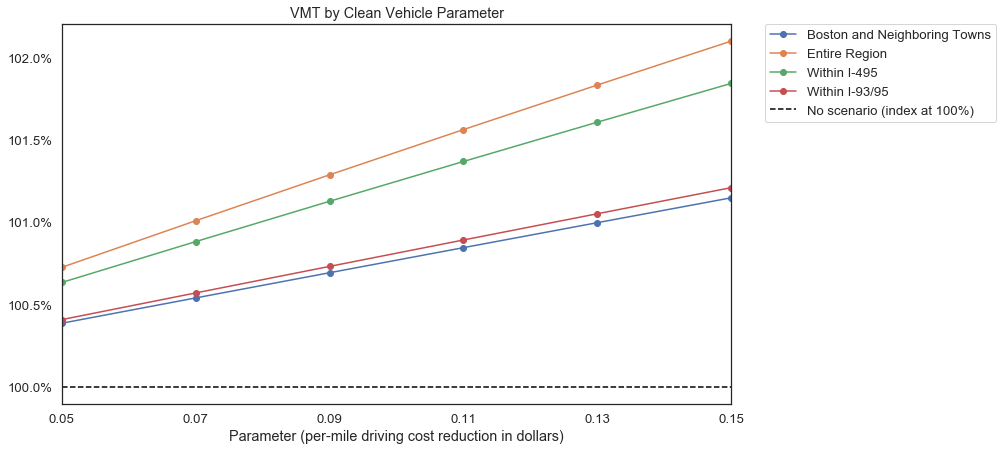

In [72]:
# single scenario: sensitivity
import os

scenario_dir = '../output/sensitivity/clean_veh/'

# mode share
df_mode_share = pd.read_csv(r'..\output\mode_share_summary_subregions.csv',index_col = 0).drop(['smart mobility'],axis = 1).assign(parameter = "No Scenario")

import os
for dirs in next(os.walk(scenario_dir))[1]:
    try:
        df_mode_share = pd.concat([df_mode_share,
    pd.read_csv(scenario_dir+dirs+'/mode_share_summary_subregions.csv',index_col = 0).drop(['smart mobility'],axis = 1).assign(parameter = dirs)],
              )
    except:pass

# line plot for mode share
from textwrap import wrap
sns.set(style="white", font_scale = 1.2)

for mode in ['drive','non-motorized','transit']:
    fig, ax = plt.subplots(figsize = (15,5))
    sns.factorplot(x = 'parameter', y = mode, hue = 'index',
        data = df_mode_share.reset_index(), ax = ax)
    
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
    
    ax.set_title(f'{mode} mode share'.title()+ ' by Clean Vehicle Parameter')
    
    ax.set_xticklabels([ '\n'.join(wrap(l.get_text(), 10)) for l in ax.get_xticklabels()])
    
    ax.set_ylabel('')
    ax.set_xlabel('Parameter (per-mile driving cost reduction in dollars)')
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# VMT
df_vmt = pd.read_csv(r'..\output\vmt_summary_subregions.csv',index_col = 0).assign(parameter = "No Scenario")
for dirs in next(os.walk(scenario_dir))[1]:
    try:
        df_vmt = pd.concat([df_vmt,
    pd.read_csv(scenario_dir+dirs+'/vmt_summary_subregions.csv',index_col = 0).assign(parameter = dirs)],
              )
    except:pass


df = df_vmt.reset_index().pivot('parameter','index')
df1 = df.div(df.loc['No Scenario']).drop('No Scenario').droplevel(0, axis = 1)

ax = df1.plot(figsize = (12,7), marker = 'o')
ax.axhline(1, ls = '--', color = 'black', label = 'No scenario (index at 100%)')

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])

ax.set_title('VMT by Clean Vehicle Parameter')

ax.set_xticklabels([ '\n'.join(wrap(l.get_text(), 15)) for l in ax.get_xticklabels()])

ax.set_ylabel('')
ax.set_xlabel('Parameter (per-mile driving cost reduction in dollars)')

ax.legend().set_title('Geography')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


C:\Users\xy.chang\AppData\Local\conda\conda\envs\py36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\xy.chang\AppData\Local\conda\conda\envs\py36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\xy.chang\AppData\Local\conda\conda\envs\py36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the defau

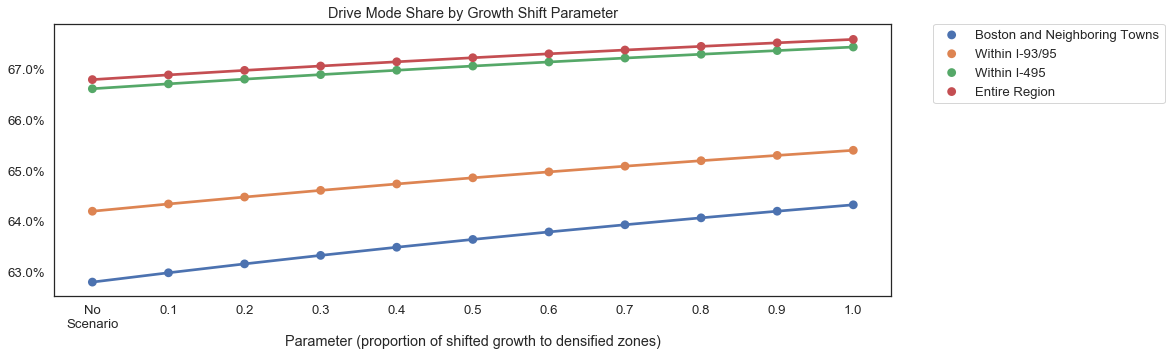

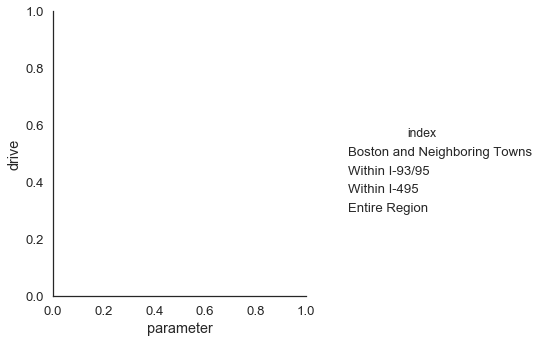

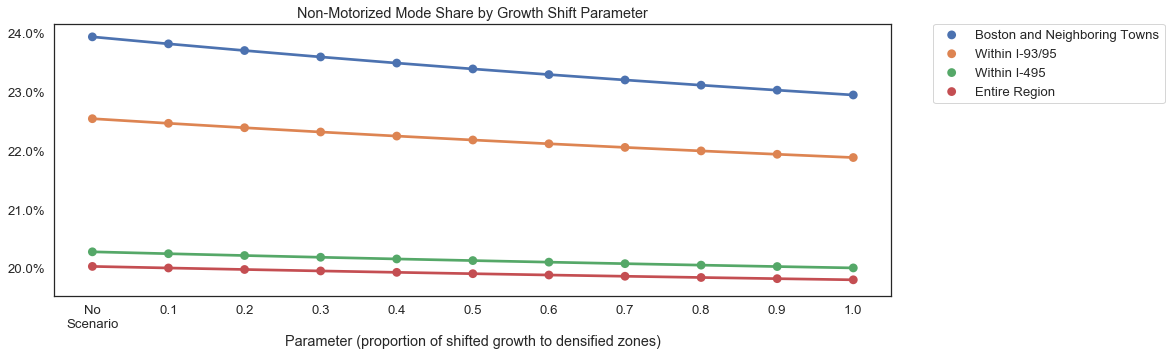

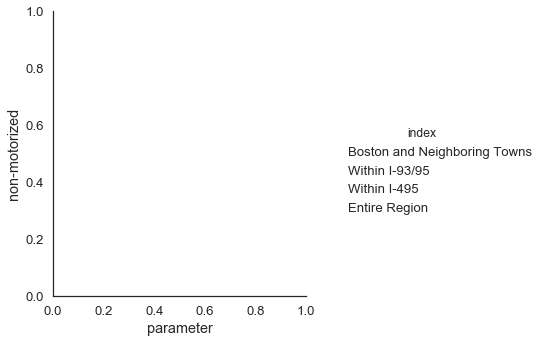

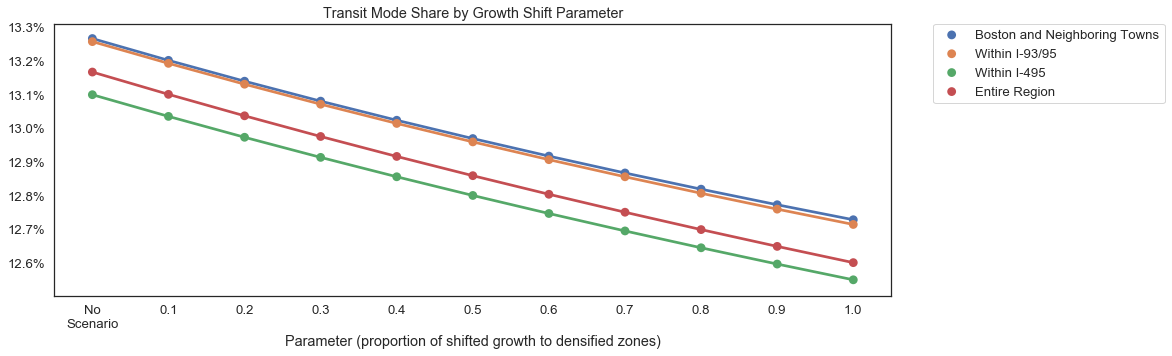

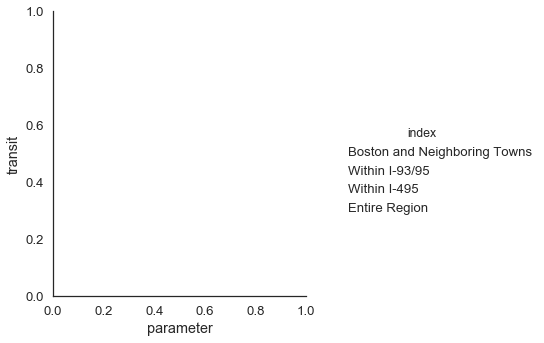

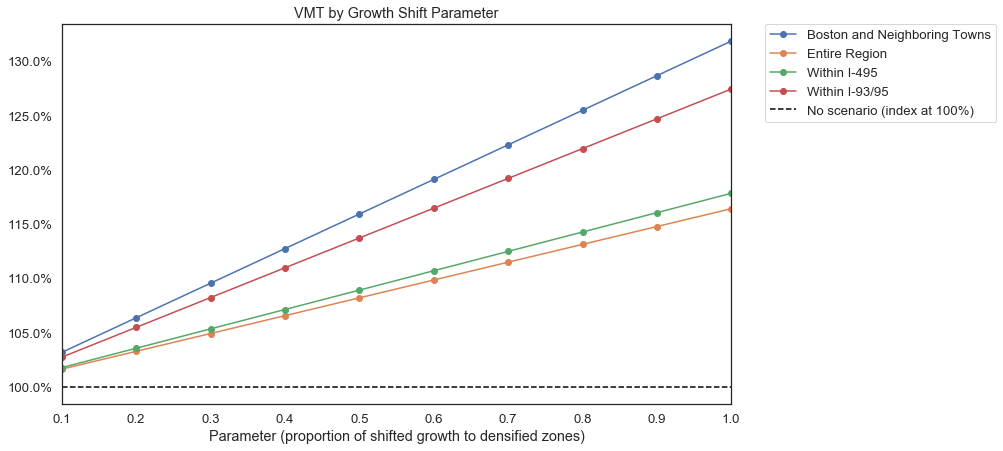

In [76]:
# Growth shift
import os

scenario_dir = '../output/sensitivity/growth_shift/'

# mode share
df_mode_share = pd.read_csv(r'..\output\mode_share_summary_subregions.csv',index_col = 0).drop(['smart mobility'],axis = 1).assign(parameter = "No Scenario")

import os
for dirs in next(os.walk(scenario_dir))[1]:
    try:
        df_mode_share = pd.concat([df_mode_share,
    pd.read_csv(scenario_dir+dirs+'/mode_share_summary_subregions.csv',index_col = 0).drop(['smart mobility'],axis = 1).assign(parameter = dirs)],
              )
    except:pass

# line plot for mode share
from textwrap import wrap
sns.set(style="white", font_scale = 1.2)

for mode in ['drive','non-motorized','transit']:
    fig, ax = plt.subplots(figsize = (15,5))
    sns.factorplot(x = 'parameter', y = mode, hue = 'index',
        data = df_mode_share.reset_index(), ax = ax)
    
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
    
    ax.set_title(f'{mode} mode share'.title()+ ' by Growth Shift Parameter')
    
    ax.set_xticklabels([ '\n'.join(wrap(l.get_text(), 10)) for l in ax.get_xticklabels()])
    
    ax.set_ylabel('')
    ax.set_xlabel('Parameter (proportion of shifted growth to densified zones)')
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# VMT
df_vmt = pd.read_csv(r'..\output\vmt_summary_subregions.csv',index_col = 0).assign(parameter = "No Scenario")
for dirs in next(os.walk(scenario_dir))[1]:
    try:
        df_vmt = pd.concat([df_vmt,
    pd.read_csv(scenario_dir+dirs+'/vmt_summary_subregions.csv',index_col = 0).assign(parameter = dirs)],
              )
    except:pass


df = df_vmt.reset_index().pivot('parameter','index')
df1 = df.div(df.loc['No Scenario']).drop('No Scenario').droplevel(0, axis = 1)

ax = df1.plot(figsize = (12,7), marker = 'o')
ax.axhline(1, ls = '--', color = 'black', label = 'No scenario (index at 100%)')

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])

ax.set_title('VMT by Growth Shift Parameter')

ax.set_xticklabels([ '\n'.join(wrap(l.get_text(), 15)) for l in ax.get_xticklabels()])

ax.set_ylabel('')
ax.set_xlabel('Parameter (proportion of shifted growth to densified zones)')

ax.legend().set_title('Geography')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


C:\Users\xy.chang\AppData\Local\conda\conda\envs\py36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\xy.chang\AppData\Local\conda\conda\envs\py36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\xy.chang\AppData\Local\conda\conda\envs\py36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the defau

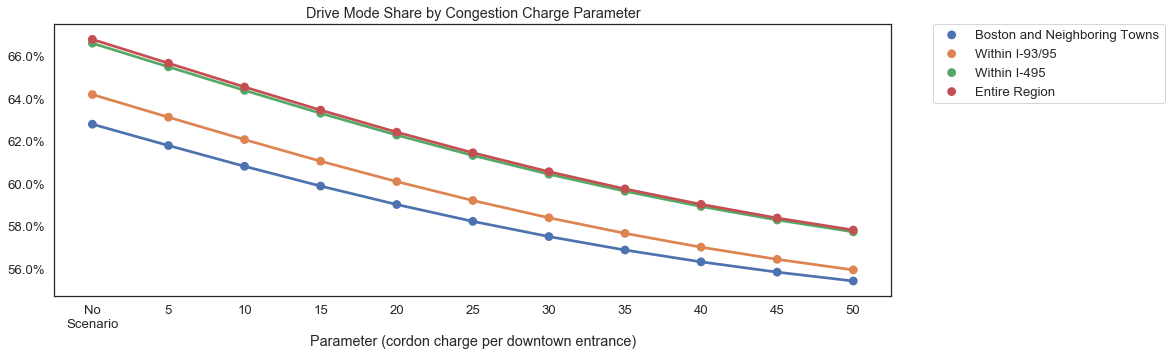

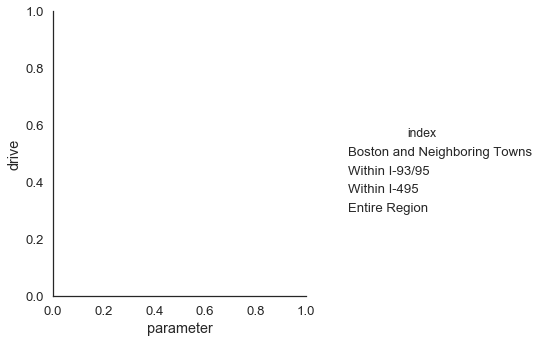

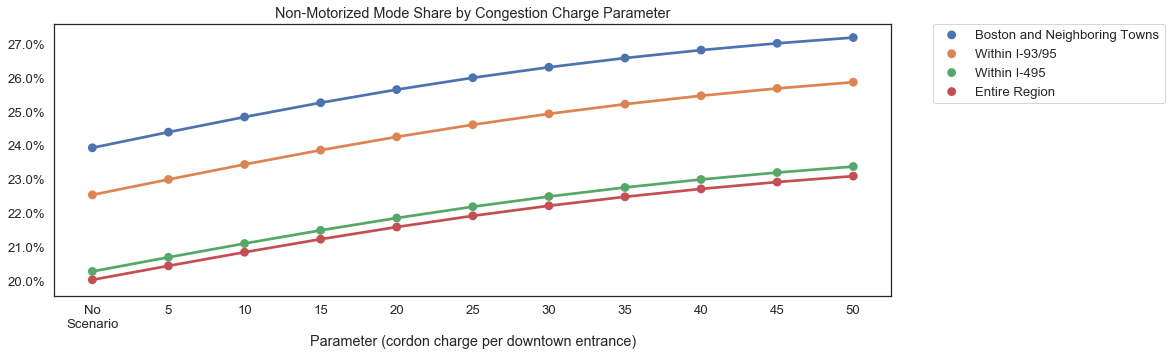

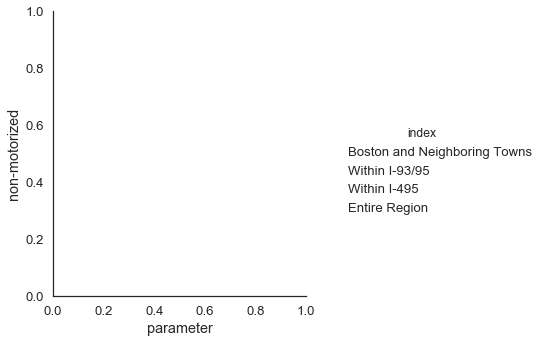

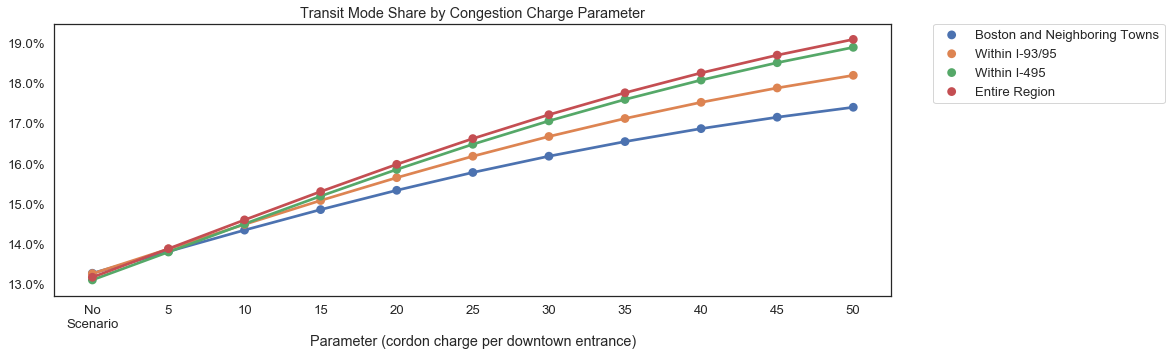

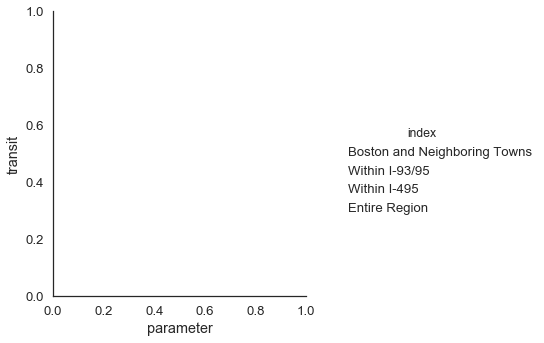

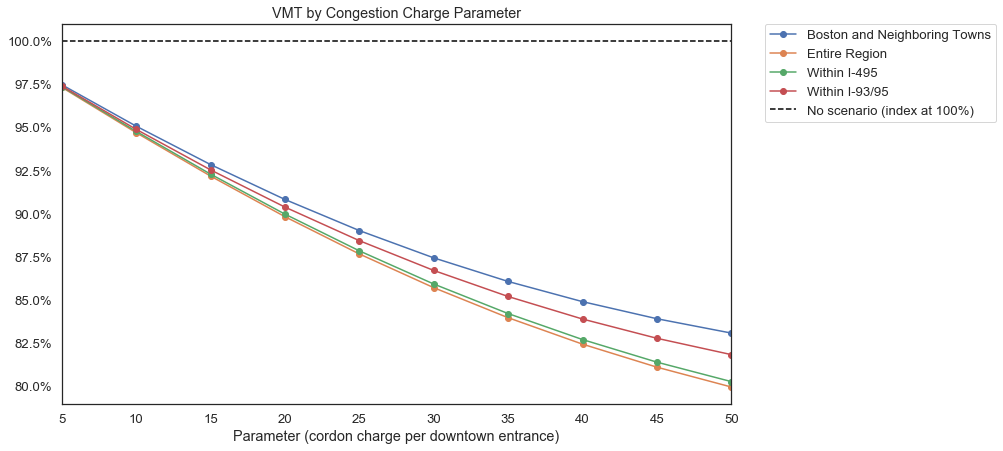

In [91]:
# Congestion charge
import os

scenario_dir = '../output/sensitivity/congestion_charge/'

# mode share
df_mode_share = pd.read_csv(r'..\output\mode_share_summary_subregions.csv',index_col = 0).drop(['smart mobility'],axis = 1).assign(parameter = "No Scenario")

import os
for dirs in[str(i) for i in range(5,55,5)]:
    try:
        df_mode_share = pd.concat([df_mode_share,
    pd.read_csv(scenario_dir+dirs+'/mode_share_summary_subregions.csv',index_col = 0).drop(['smart mobility'],axis = 1).assign(parameter = dirs)],
              )
    except:pass

# line plot for mode share
from textwrap import wrap
sns.set(style="white", font_scale = 1.2)

for mode in ['drive','non-motorized','transit']:
    fig, ax = plt.subplots(figsize = (15,5))
    sns.factorplot(x = 'parameter', y = mode, hue = 'index',
        data = df_mode_share.reset_index(), ax = ax)
    
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
    
    ax.set_title(f'{mode} mode share'.title()+ ' by Congestion Charge Parameter')
    
    ax.set_xticklabels([ '\n'.join(wrap(l.get_text(), 10)) for l in ax.get_xticklabels()])
    
    ax.set_ylabel('')
    ax.set_xlabel('Parameter (cordon charge per downtown entrance)')
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# VMT
df_vmt = pd.read_csv(r'..\output\vmt_summary_subregions.csv',index_col = 0).assign(parameter = "No Scenario")
for dirs in [str(i) for i in range(5,55,5)]: # next(os.walk(scenario_dir))[1]:
    try:
        df_vmt = pd.concat([df_vmt,
    pd.read_csv(scenario_dir+dirs+'/vmt_summary_subregions.csv',index_col = 0).assign(parameter = dirs)],
              )
    except:pass


df = df_vmt.reset_index().pivot('parameter','index')
df1 = df.div(df.loc['No Scenario']).drop('No Scenario').droplevel(0, axis = 1)
df1.index = df1.index.astype(int)
df1.sort_index(inplace = True)

ax = df1.plot(figsize = (12,7), marker = 'o')
ax.axhline(1, ls = '--', color = 'black', label = 'No scenario (index at 100%)')

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])

ax.set_title('VMT by Congestion Charge Parameter')

# ax.set_xticklabels([ '\n'.join(wrap(l.get_text(), 15)) for l in ax.get_xticklabels()])

ax.set_ylabel('')
ax.set_xlabel('Parameter (cordon charge per downtown entrance)')

ax.legend().set_title('Geography')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
